# Assignment

## 1. Floating Point Variables

In [2]:
import numpy as np
from matplotlib import pyplot as plt

### a) Write a short program to calculate the floating-point machine accuracy on your system.

In [3]:
#For Double Point Precision (64-bit)

def MachineAcc(f = np.float64):
    
    accuracy = f(1)
    Power2 = 0              #define a counter that starts from 0 
    
    while f(1)+ f(accuracy) != f(1): #does not return 1 when you add the small increment
        
        accuracy_last = accuracy #last float used 
         
        accuracy = f(accuracy) / f(2)
        Power2+=1
        
        
    return "64-bit Machine Accuracy= " + str(accuracy) ,"Power of 2= " + str(-Power2) #How many times we divide by 2
   

In [4]:
MachineAcc(np.float64)

('64-bit Machine Accuracy= 1.1102230246251565e-16', 'Power of 2= -53')

To test, can subtract the numbers from 1:

In [5]:
print(1-2**(-54))     #This should come out to be 1.0
print(1-2**(-53))
print(1-2**(-52))

1.0
0.9999999999999999
0.9999999999999998


### Single Point Precision (32-bit)

In [6]:
#Do the same for Single Point Precision (32-bit)
def MachineAcc(f = np.float32):
    
    accuracy = f(1)
    Power2 = 0
    
    while f(1)+ f(accuracy) != f(1): #does not return 1 when you add the small increment
        
        accuracy_last = accuracy #last float used 
         
        accuracy = f(accuracy) / f(2)
        Power2+=1
        #print(Power2)
        
    return "32-bit Machine Accuracy= " + str(accuracy) ,"Power of 2= " + str(-Power2) #How many times we divide by 2

In [7]:
MachineAcc(np.float32)

('32-bit Machine Accuracy= 5.9604645e-08', 'Power of 2= -24')

### Extended Precision Floating Point Variables

In [8]:
def MachineAcc(f = np.float128):
    
    accuracy = f(1)
    Power2 = 0
    
    while f(1)+ f(accuracy) != f(1): #does not return 1 when you add the small increment
        
        accuracy_last = accuracy #last float used 
         
        accuracy = f(accuracy) / f(2)
        Power2+=1
        #print(Power2)
        
    return "128-bit Machine Accuracy= " + str(accuracy) ,"Power of 2= " + str(-Power2) #How many times we divide by 2

In [9]:
MachineAcc(np.float128)

('128-bit Machine Accuracy= 5.42101086242752217e-20', 'Power of 2= -64')

## 2. Matrix Methods

### a) Write a code to carry out LU decomposition of an arbitrary N × N matrix using Crout’s method. Return the result in the form of an N ×N matrix containing all the elements of U, and the non-diagonal elements of L. Your routine may either return the result as a new matrix, or just overwrite the input matrix. You needn’t implement pivoting (although you can if you like).


### (b) Use your routine to express the matrix A (given) as a product of upper and lower diagonal matrices, and compute det(A) using your answer.


In [10]:
def CroutAlgo(A1 = np.matrix('3 1 0 0 0 ; 3 9 4 0 0 ; 0 9 20 10 0 ; 0 0 -22 31 -25 ; 0 0 0 -55 60')):
    
    A = A1
    N = len(A)                  #length of matrix A
    lower = np.identity(N)      #Lower is identity matrix with dimensions N
    temp = (N,N)                #size of our square zero matrix
    upper = np.zeros(temp)      #Upper is an empty (zeros) matrix to begin with
     
    for j in range(0,N):
        
        for i in range(0,N):
        
            s=0                 #Set sum = 0 for every iteration
            
            if i <= j:
                
                for k in range(0,i):
                    
                    s += lower[i,k] * upper[k,j]
                                    
                upper[i,j] = A[i,j] - s
     
            if i > j:
                
                for k in range(0,j):
                    
                    s += lower[i,k] * upper[k,j]
            
                lower[i,j] = (1/upper[j,j]) * (A[i,j] - s)

    """
    By returning the dot product (matrix multiplication) we can make sure that we recover
    the original matrix A, as is indeed the case.

    """ 
    #The last output is the N x N matrix requested by the question.

    return ("Lower", lower, "Upper", upper, "A", np.dot(lower,upper), lower + upper - np.identity(N))


In [11]:
CroutAlgo()

('Lower',
 array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 1.        ,  1.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  1.125     ,  1.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        , -1.41935484,  1.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , -1.21698787,  1.        ]]),
 'Upper',
 array([[  3.        ,   1.        ,   0.        ,   0.        ,
           0.        ],
        [  0.        ,   8.        ,   4.        ,   0.        ,
           0.        ],
        [  0.        ,   0.        ,  15.5       ,  10.        ,
           0.        ],
        [  0.        ,   0.        ,   0.        ,  45.19354839,
         -25.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ,
          29.57530335]]),
 'A',
 array([[  3.,   1.,   0.,   0.,   0.],
        [  3.,   9.,   4.,   0.,   0.],
        [  0.,   9.,  20.,  10.,   0.],
        [  0.,   0., -22.,  31

### Now find the Determinant of A, det(A)

In [12]:
#Determinant of A is found by multiplying the diagonal entries of Upper matrix

upper = CroutAlgo()[3]       #setting upper as being the particular output from our previous function

def GetDet(upper):           
    det = 1                  #define initial value as 1 so as to not change product of first iteration
    N = len(upper)           #size of the upper matrix
    
    for i in range(0,N):             #move across rows
        
        for j in range(0,N):        #move across columns
            
            if i==j:                    #these are all the diagonal entries
                
                det *= upper[i][j]       #apply the product
                
    return det
    

In [13]:
GetDet(upper = CroutAlgo()[3])

497220.0

In [14]:
#To check that the determinant is indeed correct use Numpy:
np.linalg.det(CroutAlgo()[3])

497219.9999999995

The two determinants clearly agree, with the former method rounding up.

### (c)Write a short function that solves the matrix equation LUx = b for x using forward and back substitution,where L and U are N × N upper and lower-triangular matrices, respectively. Here L, U and the vector b should be input parameters of your routine.

### d) Use your routine together with that of a) to solve Ax = b (b is given)

In [15]:
def Solver(L = CroutAlgo()[1], U = CroutAlgo()[3], b = np.matrix('2 ; 5  ; -4  ; 8  ; 9 ')):
    
    N = len(b)
    y = np.matrix([np.zeros(N)])
    y.shape = (N,1)
    x = np.matrix([np.zeros(N)])
    x.shape = (N,1)
        
    y[0] = b[0] / L[0,0]               #Manually set first value of y 
    
    x[N-1] = y[N-1] / U[N-1,N-1]       #Manually set first value of x
      
    for i in range(1,N):               #Forward Substitution
        
        s=0                              #set sum to zero each time this loop iterates
        
        for j in range(0, i):
             
            s += L[i,j] * y[j]                #This is the sum
            
            
        y[i] = (1/L[i,i]) * (b[i] - s)        #modify the entry of our y zero-matrix
        
    for i in range(N-1, -1, -1):     #Back Substitution - same principle as above but now from the other way
        
        s=0 
        
        for j in range(i+1, N):     
            
            s += U[i,j] * x[j]
        
        x[i] = (1/U[i,i]) * (y[i] - s)
    
    return ("Solution is", x)
                

In [16]:
Solver()

('Solution is', matrix([[ 0.45617634],
         [ 0.63147098],
         [-0.51294196],
         [ 0.05756003],
         [ 0.20276336]]))

### Use your routine together with that of a) to calculate inv(A).

In [17]:
def GetInv(A = np.matrix('3 1 0 0 0 ; 3 9 4 0 0 ; 0 9 20 10 0 ; 0 0 -22 31 -25 ; 0 0 0 -55 60')):
    
    """
    This function will calculate the inverse of the matrix A by solving each separate
    column vector independently and then stacking together all the solutions to give
    us our final matrix.
    """
    
    B = np.asarray(A)     #Take matrix as an array for easier manipulation
    N = len(B)            #Length/Size of B = Size of matrix A
    C = np.identity(N)     #Identity matrix of size N = size of matrix A 
    S = []                 #Create an empty list that will be appended with the separate column vectors

    for i in range(0,N):
        
        vectorb = C[:,[i]]    #Slice of identity matrix
        temp = Solver(L = CroutAlgo()[1], U = CroutAlgo()[3], b = vectorb)[1] #Each separate column vector
        S.append(temp)       #append the list of solutions
                
    sol = np.hstack(S)         #final solution is the stacked list
   
    return sol

In [18]:
GetInv()

matrix([[ 0.37938941, -0.04605607,  0.00390169, -0.00482684, -0.00201118],
        [-0.13816822,  0.13816822, -0.01170508,  0.01448051,  0.00603355],
        [ 0.02633643, -0.02633643,  0.02341016, -0.02896102, -0.01206709],
        [ 0.07167853, -0.07167853,  0.06371425,  0.04488959,  0.01870399],
        [ 0.06570532, -0.06570532,  0.05840473,  0.04114879,  0.03381199]])

Can test by using $AA^{-1} = I$:

In [19]:
Ainv = GetInv()
A = np.matrix('3 1 0 0 0 ; 3 9 4 0 0 ; 0 9 20 10 0 ; 0 0 -22 31 -25 ; 0 0 0 -55 60')
print (A * Ainv)

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   8.67361738e-19]
 [-1.94289029e-16  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-5.55111512e-17  5.55111512e-17  1.00000000e+00  0.00000000e+00
   1.38777878e-17]
 [ 7.63278329e-16 -7.63278329e-16  1.52655666e-16  1.00000000e+00
   6.93889390e-18]
 [-4.99600361e-16  4.99600361e-16 -2.77555756e-16  2.77555756e-17
   1.00000000e+00]]


This is clearly the Identity matrix but there seems to be some rounding errors for values close to zero.

## 3.Interpolation

### a) Write a simple routine to perform linear interpolation on a tabulated set of x–y data.

In [20]:
def Interpolation(x = np.array([]), xvals = 0, yvals = 0): 
    
    xvals = np.array([-2.1,-1.45,-1.3,-0.2,0.1,0.15,0.8,1.1,1.5,2.8,3.8])
    yvals = np.array([0.012155,0.122151,0.184520,0.960789,0.990050,0.977751,
                       0.527292,0.298197,0.105399,3.936690E-4,5.355348E-7])
    
    """
    The above arrays are the data tabulated within the question. They can be modified
    for any input data. The two must be of the same dimensions(size).
    """
    
    plt.plot(xvals,yvals, 'o', color = 'black', label = 'Tabulated Data')   #Plotting the scatted diagram
    plt.plot(xvals,yvals, '--', color = 'blue', label = 'Linear Interpolation')
    
    N = len(xvals) - 1     
    l = []                     # empty list that will be appended
    
    for i in range(N):

        if x >= xvals[i] and x <= xvals[i+1]:       #Find the index of where the point will lie in
            
            num = (xvals[i+1] - x) * yvals[i] + (x-xvals[i]) * yvals[i+1]   #numerator
            den = xvals[i+1] - xvals[i]                                     #denominator
            fx = num / den
            l.append(fx)
             
    plt.plot(x,l, 'o', color='red', label = 'Linearly Interpolated')      #Plot the interpolatated point
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Linear Inerpolation")
    plt.legend(loc='best')
    plt.savefig("Lin_Int_Graph.pdf")
    plt.show()
        
    return (x, l)       #This returns the coordinate of the interpolated point, which is shown below in red
                

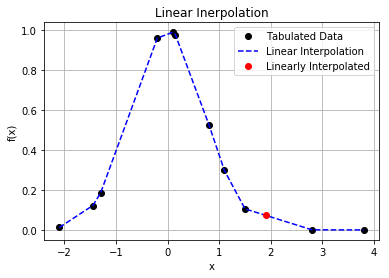

(1.9, [0.07308966738461539])

In [23]:
Interpolation(x=1.9)

### b) Write a routine to perform cubic spline interpolation on a tabulated set of x–y data, using the natural spline boundary condition. The matrix solver should be called as an external routine rather than coded inline into the interpolator like in Numerical Recipes. Use your own matrix solver from Q2 for this.


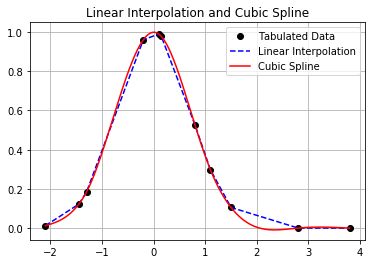

In [24]:
xvals = np.array([-2.1,-1.45,-1.3,-0.2,0.1,0.15,0.8,1.1,1.5,2.8,3.8])
yvals = np.array([0.012155,0.122151,0.184520,0.960789,0.990050,0.977751,
                       0.527292,0.298197,0.105399,3.936690E-4,5.355348E-7])

"""
Again the data above are the tabulated data that are given in the question.
They can be modified for any tabulated data, as long as they are of the same
dimensions. 
"""
    
N = len(xvals)    
M = np.zeros((N,N))         #Create our square matrix M of size NxN
b = np.zeros(N)             #Our Column matrix b that is to be modified later
    
for i in range(1,N-1):           #Loop over all but first and last rows, which are added manually below
        
    M[i,i-1] = (xvals[i] - xvals[i-1]) / 6                 
    M[i,i] = (xvals[i+1] - xvals [i-1]) / 3
    M[i,i+1] = (xvals[i+1] - xvals[i]) / 6 
    b[i] = ((yvals[i+1] - yvals[i]) / (xvals[i+1] - xvals[i])) - ((yvals[i] - yvals[i-1]) / (xvals[i] - xvals[i-1]))
        
i = 0                                           #Adding manually for first row
M[i,i] = (xvals[i+1] - xvals [i-1]) / 3
M[i,i+1] = (xvals[i+1] - xvals[i]) / 6
    
i = -1                                           #Adding manually for las row
M[i,i-1] = (xvals[i] - xvals[i-1]) / 6
M[i,i] = (xvals[i+1] - xvals [i-1]) / 3

b2 = b                           #redefine our column matrix b as it is the default argument 
lower = CroutAlgo(A1 = M)[1]     #using previous function to output lower
upper = CroutAlgo(A1 = M)[3]     #using previous function to output upper   
Fvector = Solver(L = lower, U = upper, b = b2)[1]    #This is our f-primeprime column matrix

def CubicSpline(x,fvec=Fvector, xvals = 1, yvals = 1):
    
    """
    This is the function that actually calculates all the coefficients as
    per the cubic spline formula. The data is then plotted.
    """
    
    xvals = np.array([-2.1,-1.45,-1.3,-0.2,0.1,0.15,0.8,1.1,1.5,2.8,3.8])
    yvals = np.array([0.012155,0.122151,0.184520,0.960789,0.990050,0.977751,
                       0.527292,0.298197,0.105399,3.936690E-4,5.355348E-7])
    
    
    N = len(xvals)-1 

    for i in range(N):

        if x >= xvals[i] and x <= xvals[i+1]:
            
            A = (xvals[i+1] - x) / (xvals[i+1] - xvals[i])
            B = 1-A
            C = (1/6)*(A*A*A - A)*(xvals[i+1] - xvals[i])*(xvals[i+1] - xvals[i])
            D = (1/6)*(B*B*B - B)*(xvals[i+1] - xvals[i])*(xvals[i+1] - xvals[i])
            
            return A*yvals[i] + B*yvals[i+1] + C*Fvector[i] + D*Fvector[i+1]
        
"""
Now the following code will plot the Cubic Spline interpolation for a range of different 
values of x. 
"""

y = []             #Empty list, where we will append all our y-values corresponding to the x values we input.
x = np.arange(min(xvals),max(xvals),0.001)        #Create a range of x-values to calculate f(x) and then plot against each other. 

for xdummy in x:
    f = CubicSpline(xdummy, Fvector, xvals, yvals)
    f2 = np.asarray(f)             #convert matrix form into array
    f3 = f2.ravel()                #This reshapes array from nd to 1d
    y.append(f3)

plt.plot(xvals,yvals, 'o', color = 'black', label = 'Tabulated Data')   #plot the tabulated data    
plt.plot(xvals,yvals, '--', color = 'blue', label = 'Linear Interpolation')   #plot the interpolated data    
plt.plot(x,y, '-', color = 'red', label = 'Cubic Spline')                #plot the interpolated data
plt.legend()
plt.grid()
plt.title("Linear Interpolation and Cubic Spline")
plt.savefig("Cubic_Interp_Graph.pdf")
plt.show()


In [25]:
CubicSpline(x=3)

matrix([[0.00385781]])

## 4. Fourier Transforms

### a) Write a program that uses either numpy.fft or the external FFT library FFTW (www.fftw.org, available in Python as package pyFFTW) to convolve the signal function with the response function.


In [287]:
from numpy.fft import fft, ifft, fftshift, ifftshift

First of all make the time over which this will act:

In [288]:
def MakeTime(start,end):
    
    """
    This function just creates a linspace which corresponds to our time.
    """
    
    totaltime = np.linspace(start,end,1000)
    
    return totaltime

Now from this function output the two functions that are to be convoluted

In [289]:
def MakeFunctions(t = MakeTime(-10,10)):
    
    """
    This function will create our two functions, h and g, over the time
    that was created with our MakeTime function.
    """
    
    l1 = [] #empty list that is to be appended
    l2 = [] #another empty list that is to be appended
    
    #First generate h(t) for all values of t
    for i in range(len(t)):
        
        if t[i] >= 3 and t[i] <= 5:       #Our top-hat function 
            value = 4      
        else:       
            value = 0   
        l1.append(value)
    
    h = np.asarray(l1)       #convert list into an array for easier manipulation
    
    #Now generate g(t) for all values of t
    for i in range(len(t)):
        
        value2 = (1 / (np.sqrt(2 * np.pi))) * np.exp(-t[i]**2 / 2)
        
        l2.append(value2)
        
    g = np.asarray(l2)
        
    
    return h, g                 #returns our two functions over the time we inputted.
    

Now the actual convoluting function that also plots the graphs

In [290]:
def Convolution(t = MakeTime(0,8), func1 = MakeFunctions(t= MakeTime(0,8))[0], func2 = MakeFunctions(t= MakeTime(-4,4))[1]):
    
    """
    This function will convolute the two functions together, as well as aliasing
    using the numpy's fftshift and ifftshift. It then plots the data for visualisation.
    """
    
    FTh = ifftshift(fft(fftshift(func1)))    #Fourier Transform of h(t) + also shifted with fftshift
    FTg = ifftshift(fft(fftshift(func2)))    #Fourier Transform of g(t) + also shifted with fftshift
    
    convol = ifft(fftshift(FTh * FTg))     #From the Convolution Theorem
    realconv = np.real(convol)
    spacing = (max(t) - min(t)) / len(t)      #find the length of the spacing    
    convolution = ifftshift(realconv) * spacing    #define final convolution, which is to be plotted

    #Now let's plot some figures:

    plt.figure()                        #plotting the actual functions
    plt.title("Singal, Response and their Convolution")
    plt.xlabel("$t$")
    plt.ylabel("$f(t)$")
    t= MakeTime(0,8)
    plt.plot(t, func1, '-', label = 'Signal $h(t)$', color = 'blue')
    t= MakeTime(-4,4)+4
    plt.plot(t, func2, '-', label = 'Response $g(t)$', color = 'red')
    t= MakeTime(0,8)
    plt.plot(t, convolution, '--', linewidth = 3, label = 'Convolution', color = 'green')
    plt.legend()
    plt.grid()
    plt.savefig("final_functionsGraph.pdf")
    plt.show()
    
    plt.figure()
    plt.title("Fourier Transforms ")
    plt.xlabel("Number of $i$")
    plt.ylabel("")
    plt.axis([400, 600, -300, 1050])
    plt.plot(FTh, '-', label = 'FT$[h]$', color = 'blue')
    plt.plot(FTg, '-', label = 'FT$[g]$', color = 'red')
    plt.legend()
    plt.grid()
    plt.savefig("final_FTGraph.pdf")
    plt.show()

### b) Plot h(t), g(t) and (g ∗ h)(t) over appropriate ranges in t.

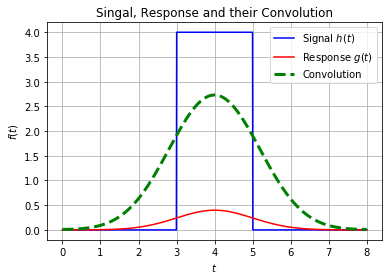

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


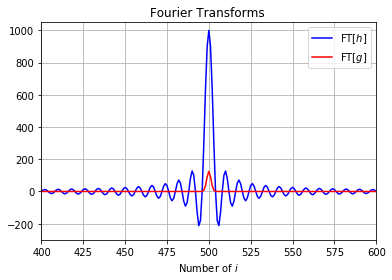

In [291]:
Convolution()

## 5. Random Numbers

### a) Using a decent built-in uniform deviate generator (or one from an external library – either way, justify your choice), write a short program to compute $10^{5}$ uniformly-distributed random numbers over the interval x ∈ [0, 1], based on a single seed. Plot the resultant distribution as a binned histogram, with the value of x on the x axis and the number of samples in the bin on the y axis. Choose an appropriate number of bins.

In [292]:
import time       #this is so we can time how long it will take to run through the script.

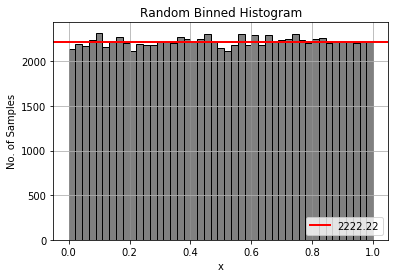

In [299]:
np.random.seed(seed = 5)          #Set the seed as being 5 ...
x = np.random.uniform(0,1,100000) #Why pick this?

"""
This creates uniformly spaced random numbers that are created using a seed (in this case 5).
We are creating 10^5 numbers between 0 and 1. 
"""

count, bins, ignored = plt.hist(x, 45, normed=False,color = 'grey', edgecolor = 'black')      #plot the histogram with the bins
plt.xlabel('x')
plt.ylabel('No. of Samples')
plt.axhline(y = 100000/45 ,linewidth=2, color='r', label = '2222.22')
plt.legend(loc = 'lower right')
plt.title('Random Binned Histogram')
plt.grid()
plt.savefig("AA_Linear.pdf")
plt.show()


### Now compute random numbers distributed over the interval x ∈ [0, π]. Use the transformation method, and show your preparatory working out. Plot the resultant distribution for $10^{5}$ points based on a single seed.



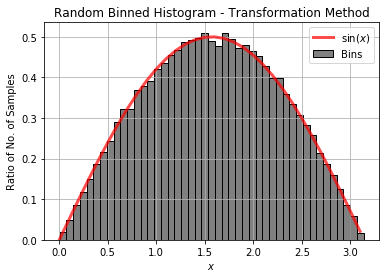

Time taken to produce the Samples using the Transformation Method:  0.011598825454711914


In [300]:
np.random.seed(seed = 5)          #Set the seed as being 5 ...
a = np.random.uniform(0,1,100000) #Why pick this?
"""
Same principle as before, but now instead of plotting these numbers we plot
a different function, in this case a different pdf.
"""
trans_t1 = time.time()
y = np.arccos(1-2*a)
trans_t2 = time.time()
trans_timetaken = trans_t2 - trans_t1

count,bins, ignored = plt.hist(np.arccos(1-(2*a)), 45, density = True, color = 'grey', edgecolor = 'black', label = 'Bins')
x = np.arange(0,np.pi,0.1)
plt.plot(x, (1/2)*np.sin(x), linewidth = 3, color = 'red',alpha = 0.7, label = "$\sin(x)$")
plt.title("Random Binned Histogram - Transformation Method")
plt.xlabel('$x$')
plt.ylabel('Ratio of No. of Samples')
plt.grid()
plt.legend()
plt.savefig("AA_trans.pdf")
plt.show()

print("Time taken to produce the Samples using the Transformation Method: ", trans_timetaken)
    

### c) Write another short program to fo the same thing instead using the rejection method, for the distribution $pdf(x) = \frac{2}{\pi}\sin^{2}{x}$ again over x ∈ [0, π]. Include a similar plot, with $10^{5}$ samples based on a single seed. 

Time taken to produce the Samples using the Rejection Method:  6.273681163787842


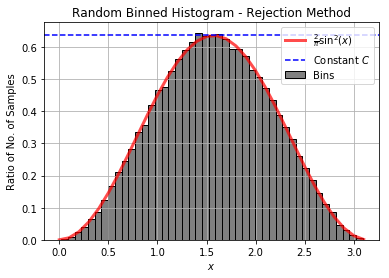

In [301]:
vals = []      #Empty list which will be appended for every success
accept = 0       
"""
Setting our C to be equal to a number which is always > P(y) for simplicity.
Let's choose C = 0.8 which is more than 2/pi
"""
C = 2 / np.pi #constant C 
nobins = 45   #The number of bins

reject_t1 = time.time()
while accept < 100000:
    
    y_i = np.random.uniform(0,np.pi)    #random number between 0 and pi
    p_i = np.random.uniform(0, C)       #random number between 0 and C        
    
    pdf = (2 / np.pi) * (np.sin(y_i))*(np.sin(y_i)) #our pdf
    
    if pdf > p_i:
        
        vals.append(y_i)  #accept therefore we are one more             
        accept += 1
        
    else:
        continue        #If the value of pdf is not > p_i, then re-enters loop and carries on without counting.
        
reject_t2 = time.time()     #Calculates time until here, as we have done produced our samples. 
reject_timetaken = reject_t2 - reject_t1

count, bins, ignored = plt.hist(vals, nobins, density = True, color = 'grey', edgecolor = 'black', label = 'Bins')
x = np.arange(0,np.pi,0.1)
plt.plot(x,(2/np.pi)*np.sin(x)*np.sin(x), linewidth = 3, color = 'red',alpha = 0.7, label = "$\\frac{2}{\pi}\sin^{2}(x)$")
plt.axhline(y=C, color='blue', linestyle='--', label = 'Constant $C$')
plt.legend(loc = 'best')
plt.grid()
plt.title("Random Binned Histogram - Rejection Method")
plt.xlabel("$x$")
plt.ylabel("Ratio of No. of Samples")
plt.savefig("AA_rejection.pdf")

print("Time taken to produce the Samples using the Rejection Method: ", reject_timetaken)
    

Ratio of time taken to produce $10^{5}$ samples in this question, compared to the previous question:

In [302]:
print("Time taken to produce samples using Transformation Method: ", trans_timetaken)
print("Time taken to produce samples using Rejection Method: ", reject_timetaken)

#Now let's calculate the ratio of the times:

ratio = reject_timetaken / trans_timetaken

print("The ratio of the time taken for the Transformation to Rejection method is: ", ratio)


Time taken to produce samples using Transformation Method:  0.011598825454711914
Time taken to produce samples using Rejection Method:  6.273681163787842
The ratio of the time taken for the Transformation to Rejection method is:  540.8893502435816
